In [1]:
# Dependencies and Setup
import pandas as pd
import requests
import numpy as np
import io
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint

# Import API key
from config import geoapify_key


In [2]:
 # Downloading the csv file from your GitHub account
# Make sure the url is the raw version of the file on GitHub
url = "https://raw.githubusercontent.com/brown016340/Project-1/development/Resources/2018_Squirrel_Data.csv"
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe

squirrel_df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe

squirrel_df.head()

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)


In [3]:
# Lets get a total for the number of times a given behavior is exhibited and not exhibited
squirrel_df["Approaches"].value_counts()

Approaches
False    2845
True      178
Name: count, dtype: int64

In [4]:
# Narrow down DF to rows where a given behavior is True
# In this case, lets narrow it to where Approaches is True
approaches = squirrel_df[squirrel_df["Approaches"] == True]

# Reset Index
approaches = approaches.reset_index(drop=True)

approaches

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.957956,40.795934,38C-PM-1014-09,38C,PM,10142018,9,Adult,Black,NaN,...,False,False,False,False,False,True,False,False,NaN,POINT (-73.9579564338627 40.7959337795027)
1,-73.958497,40.798289,40B-AM-1019-03,40B,AM,10192018,3,Juvenile,Gray,White,...,False,False,False,False,True,True,False,False,NaN,POINT (-73.9584970643213 40.7982886348696)
2,-73.974563,40.769260,5E-AM-1008-06,05E,AM,10082018,6,Adult,Cinnamon,White,...,False,False,False,False,False,True,False,False,NaN,POINT (-73.9745630038492 40.7692602628745)
3,-73.961071,40.791483,32D-AM-1013-06,32D,AM,10132018,6,Adult,Cinnamon,NaN,...,False,False,False,False,True,True,False,False,NaN,POINT (-73.9610705592868 40.7914829661051)
4,-73.952868,40.792581,36I-PM-1007-13,36I,PM,10072018,13,Adult,Gray,Cinnamon,...,False,False,False,False,True,True,False,False,NaN,POINT (-73.9528682507794 40.7925807808307)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,-73.974731,40.765389,1G-PM-1010-03,01G,PM,10102018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,True,False,False,NaN,POINT (-73.9747313152152 40.7653888351839)
174,-73.976739,40.768932,4D-PM-1008-10,04D,PM,10082018,10,Adult,Cinnamon,"Gray, White",...,False,False,False,False,False,True,False,False,NaN,POINT (-73.9767389132988 40.7689323691424)
175,-73.972408,40.774416,11D-AM-1010-08,11D,AM,10102018,8,Adult,Cinnamon,"Gray, White",...,False,False,False,False,False,True,False,False,NaN,POINT (-73.9724083320538 40.7744163768061)
176,-73.975208,40.775538,11B-AM-1007-01,11B,AM,10072018,1,Adult,Cinnamon,Gray,...,False,False,False,False,True,True,False,False,NaN,POINT (-73.9752079247419 40.7755376979002)


In [5]:
# What is the breakdown of the number of squirrels with each fur color that approached?
approaches_df = pd.DataFrame(approaches["Primary Fur Color"].value_counts())
approaches_df

,count
Primary Fur Color,
Gray,126
Cinnamon,44
Black,6


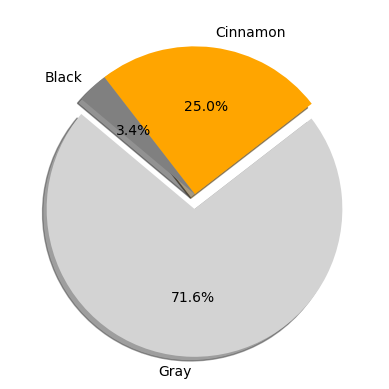

In [6]:
# Lets make a pie chart for the ones that approach, breaking it down by color
# plt.pie(approaches_df["count"])

labels = ["Gray", "Cinnamon", "Black"]
sizes = approaches_df["count"]
colors = ["lightgray", "orange", "grey"]
explode = (0.1, 0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.show()

In [ ]:
# Make the map


In [ ]:
# Plot the points for where Approaches is true
